# Segmentation Result Evaluation

So far, we have seen few segmentation techniques and their output on different images. We also saw that a single algorithm can give us different output based on it's hyperparameters. Like simple thresholding method gives different output for different thresholds. 

The discussion so far, raises a question about how can we evaluate which segmentation output is better than others. Earlier we saw that we motivated Otsu's thresholding method using the same logic. Sum of intra-class variances is one such method which gave us a good way to assess segment purity. This method was an **unsupervised** way of assessing segment quality.

However if we have a _ground truth map_ of our image, that is we know the desired result we want to achieve by out segmentation technique then we can measure our method's performance by comparing the output and the ground truth. This is a **supervised** method for segmentation quality assessment. The following can be some criteria which such techniques should fullfil:

- Easy to code
- Quantifiable output
- Suitable for vectorization

If we have metrics which suit these criteria and we have ground truth maps (expensive) then we can think about building supervised algorithms which can be based on optimizing these metrics. That would be very cool because it will give us good control and directionality over our techniques. Let's look at couple of these metrics.

## Intersection Over Union (IOU)

- Simply put IOU is the ratio of intersection and union.
- Intersection and union are calculated between the segmented output and ground truth. 
- This metric values range between 0 and 1 (both inclusive).
- 0 means the output is garbage and 1 means a perfect match.
- IOU for given segmented image = $\frac{\sum_{i=1}^{N} IOU_{i}}{N}$ . Where N is the number of segments.

The following image shows a easy to understand visualization of the IOU metric:

<figure>
    <img src="https://www.pyimagesearch.com/wp-content/uploads/2016/09/iou_equation.png" width = 300px/>
    <figcaption style = "text-align:center">IOU Visualization. Ref: 
        <a href="https://www.pyimagesearch.com/2016/11/07/intersection-over-union-iou-for-object-detection/">PyImageSearch IOU</a>
    </figcaption>
</figure>

The following image shows different cases which result in different values of the metric:

<figure>
    <img src="http://ronny.rest/media/tutorials/localization/ZZZ_IMAGES_DIR/iou_scores.png" width = 500px/>
    <figcaption style = "text-align:center">IOU Score Comparison. Ref: 
        <a href="http://ronny.rest/tutorials/module/localization_001/iou/">Ronny Tutorials IOU</a>
    </figcaption>
</figure>

Let's see an implementation of this metric.

In [148]:
import numpy as np
from sklearn.metrics import confusion_matrix

In [149]:
 def compute_iou(y_pred, y_true):
    y_pred = y_pred.flatten()
    y_true = y_true.flatten()
     
    current = confusion_matrix(y_true, y_pred, labels=[0, 1])
#     print('Confusion Matrix : \n {}'.format(current))
    
    # compute mean iou
    intersection = np.diag(current)
    ground_truth_set = current.sum(axis=1)
    predicted_set = current.sum(axis=0)
    union = ground_truth_set + predicted_set - intersection
#     print('Union : {}, Intersection: {}'.format(union, intersection))
    IoU = np.mean(intersection / union.astype(np.float32))
    
#     print('IOU : {}'.format(IoU))
       
    return IoU

<figure>
    <img src="..\assets\drawings\iou.jpg" width = 500px/>
    <figcaption style = "text-align:center">IOU Example</figcaption>
</figure>

In [150]:
y_true = np.array([1, 0, 1, 1, 1])
y_pred = np.array([0, 0, 1, 1, 1])
compute_iou(y_true, y_pred)

0.625

## Dice Coefficient or F1-Score

- Dice Coefficient is just a bit different from IOU.
- It is the ratio of the intersection and the sum of pixels from both images.
- This metric also ranges between 0 and 1 (both inclusive).
- 0 means the output is garbage and 1 means a perfect match.

The following image shows a easy to understand visualization of the IOU metric:

<figure>
    <img src="https://miro.medium.com/max/858/1*yUd5ckecHjWZf6hGrdlwzA.png" width = 300px/>
    <figcaption style = "text-align:center">Dice Coefficient Visualization. Ref: 
        <a href="https://towardsdatascience.com/metrics-to-evaluate-your-semantic-segmentation-model-6bcb99639aa2">Medium Article</a>
    </figcaption>
</figure>

# Evaluating Our Examples using these Metrics

In [151]:
import cv2
import matplotlib.pyplot as plt
segment_path = '..//assets//traditional_segmentation'

In [152]:
image_1 = cv2.cvtColor(cv2.imread('..//assets//images//babatpur-1.jpg'), cv2.COLOR_BGR2RGB)
map_1 = cv2.imread('..//assets//maps//babatpur-1_mask.jpg')

output_1 = cv2.imread('{}//babatpur-1_otsu_threshold.jpg'.format(segment_path))
output_2 = cv2.imread('{}//babatpur-1_seg_50.jpg'.format(segment_path))

In [153]:
def showComparison(img, gt, results, subtitles):
    
    f, ax = plt.subplots(1, len(results)+2, figsize = (5*(len(results)+2), 5))
    ax[0].imshow(img)
    ax[1].imshow(gt, cmap = 'gray')
    for x, r in zip(ax[2:], results):
        x.imshow(r, cmap = 'gray')
    
    for i, (x, t) in enumerate(zip(ax, subtitles)):
        x.axis('off')
        if i-2>=0:
            x.set_title('{}, IOU: {:.2f}'.format(t, compute_iou(gt, results[i-2])))
        else:
            x.set_title('{}'.format(t))
    plt.suptitle('Comparing Segmentation Results')
    plt.show()

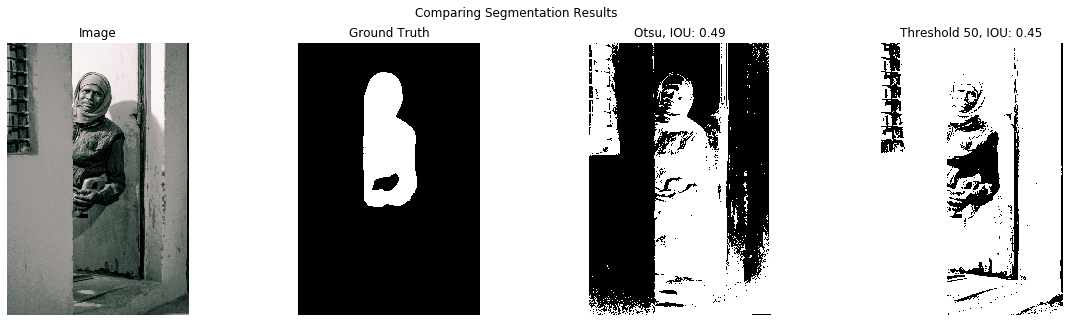

In [154]:
showComparison(image_1, map_1, [output_1, output_2], ['Image', 'Ground Truth', 'Otsu', 'Threshold 50'])

In [155]:
image_2 = cv2.cvtColor(cv2.imread('..//assets//images//bombay-1.jpg'), cv2.COLOR_BGR2RGB)
map_2 = cv2.imread('..//assets//maps//bombay-1_mask.jpg')

output_1 = cv2.imread('{}//bombay-1_kmeans_output.jpg'.format(segment_path))
output_2 = cv2.imread('{}//bombay-1_otsu_thresh.jpg'.format(segment_path))

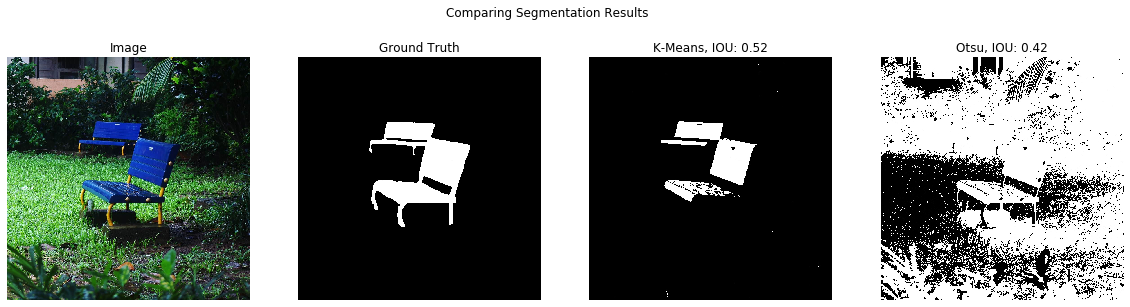

In [156]:
showComparison(image_2, map_2, [output_1, output_2], ['Image', 'Ground Truth', 'K-Means', 'Otsu'])

# Let's Look at Some Deep Learning Results

In [157]:
d1 = cv2.cvtColor(cv2.imread('..//assets//dl_segmentation//babatpur-1.png'), cv2.COLOR_BGR2RGB)
d2 = cv2.cvtColor(cv2.imread('..//assets//dl_segmentation//bombay-1.png'), cv2.COLOR_BGR2RGB)

d1_mask = cv2.imread('..//assets//dl_segmentation//babatpur-1_mask.png')
d2_mask = cv2.imread('..//assets//dl_segmentation//bombay-1_mask.png')

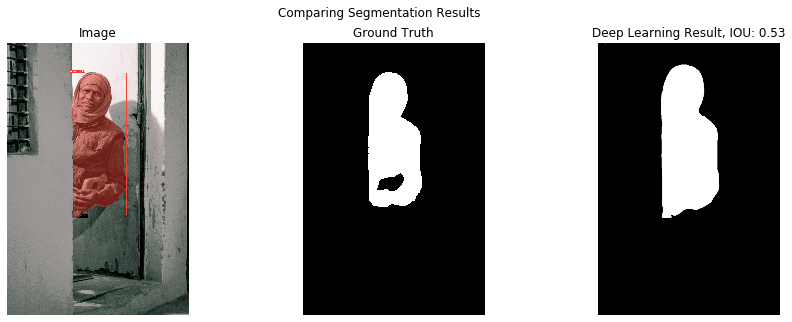

In [159]:
showComparison(d1, map_1, [d1_mask], ['Image', 'Ground Truth', 'Deep Learning Result'])

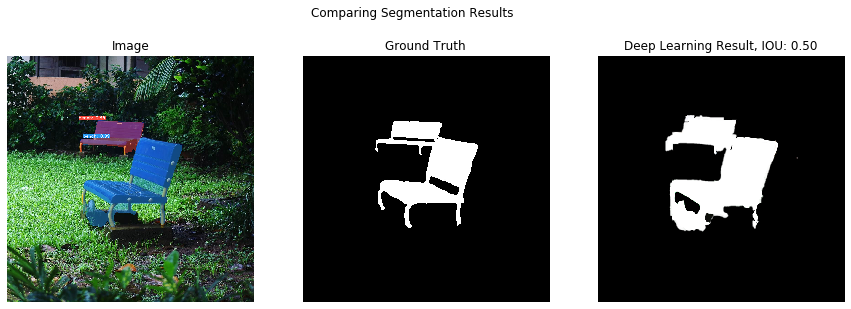

In [160]:
showComparison(d2, map_2, [d2_mask], ['Image', 'Ground Truth', 'Deep Learning Result'])

### Few Other Results from Deep Models

In [169]:
def show(img):
    f, ax = plt.subplots(1, 1, figsize = (5, 5))
    ax.imshow(img)
    plt.axis('off')
    plt.show()
    
dl_path = '..//assets//dl_segmentation'

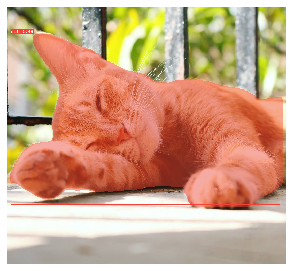

In [170]:
cat = cv2.cvtColor(cv2.imread('{}//bombay-2.png'.format(dl_path)), cv2.COLOR_BGR2RGB)
show(cat)

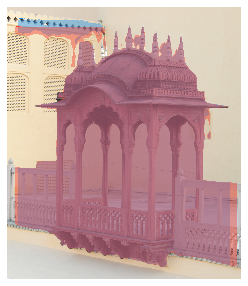

In [171]:
jaipur = cv2.cvtColor(cv2.imread('{}//jaipur-1.png'.format(dl_path)), cv2.COLOR_BGR2RGB)
show(jaipur)

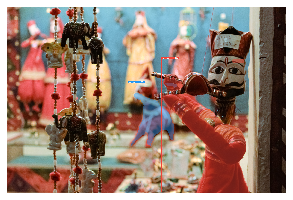

In [172]:
jaipur = cv2.cvtColor(cv2.imread('{}//jaipur-2.png'.format(dl_path)), cv2.COLOR_BGR2RGB)
show(jaipur)

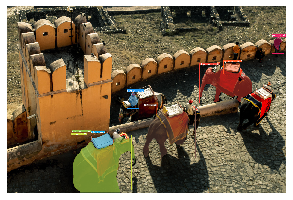

In [173]:
jaipur = cv2.cvtColor(cv2.imread('{}//jaipur-3.png'.format(dl_path)), cv2.COLOR_BGR2RGB)
show(jaipur)

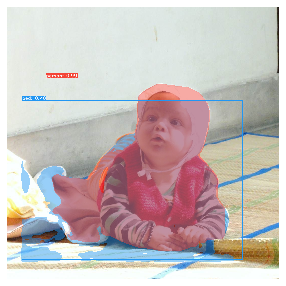

In [174]:
lko = cv2.cvtColor(cv2.imread('{}//lucknow-1.png'.format(dl_path)), cv2.COLOR_BGR2RGB)
show(lko)

# Interesting Reads

1. https://github.com/HRNet/HRNet-Semantic-Segmentation
2. https://arxiv.org/pdf/1911.01685.pdf
3. https://github.com/bermanmaxim/LovaszSoftmax
4. https://lars76.github.io/neural-networks/object-detection/losses-for-segmentation/
5. https://medium.com/@jonathan_hui/map-mean-average-precision-for-object-detection-45c121a31173
6. https://www.jeremyjordan.me/evaluating-image-segmentation-models/
7. https://github.com/dbolya/yolact